# Homework 5
You need to classify digits with SVM models in this homework. Use PCA to reduce data dimensionality (80% information remain). Compare performance of linear, radial, and polynomial kernals. Tune kernal parameters using Randomsearch method.

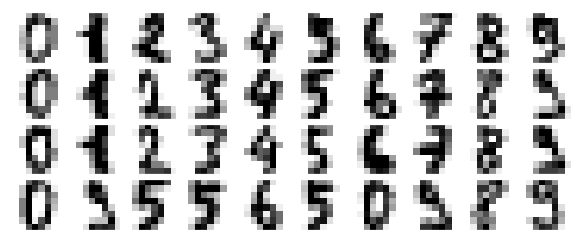

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

# use seaborn plotting defaults
import seaborn as sns; sns.set()
from sklearn import datasets, svm, metrics

# The digits dataset
digits = datasets.load_digits()

def plot_digits(data):
    fig, axes = plt.subplots(4, 10, figsize=(10, 4),
                             subplot_kw={'xticks':[], 'yticks':[]},
                             gridspec_kw=dict(hspace=0.1, wspace=0.1))
    for i, ax in enumerate(axes.flat):
        ax.imshow(data[i].reshape(8, 8),
                  cmap='binary', interpolation='nearest',
                  clim=(0, 16))
plot_digits(digits.data)

## Setup
Here we'll set up some variables for use later, and some imports for our application.

In [2]:
from sklearn.decomposition import PCA
from sklearn.model_selection import RandomizedSearchCV
from sklearn.svm import SVC
import math
import scipy.stats as stats
from timeit import timeit

X = digits.data
y = digits.target

## PCA
Using PCA, we'll reduce the dimensionality of input data to .8.

Components: 13
Explained Variance Ratio: 0.8028957761040318


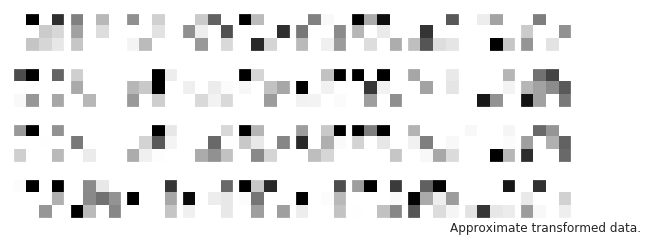

In [3]:
pca = PCA( n_components = .8 )
pca.fit(X)

print('Components: %s'%pca.n_components_)
print('Explained Variance Ratio: %s'%sum(pca.explained_variance_ratio_))

nX = pca.transform(X)

def plot_digits_transformed(data):
    fig, axes = plt.subplots(4, 10, figsize=(10, 4),
                             subplot_kw={'xticks':[], 'yticks':[]},
                             gridspec_kw=dict(hspace=0.1, wspace=0.1))
    for i, ax in enumerate(axes.flat):
        w = int(math.floor(len(data[i])**(1/2)))
        h = int(math.ceil(len(data[i])**(1/2)))
        if len(data)>w*h:
            dat = data[i][0:w*h].reshape( w, h )
        elif len(data)<w*h:
            while len(data)<w*h:
                if w>h:
                    w -= 1
                else:
                    h -= 1
            dat = data[i][0:w*h].reshape( w, h )
        else:
            dat = data[i]
        ax.imshow(dat,
                  cmap='binary', interpolation='nearest',
                  clim=(0, 16))
    plt.xlabel("Approximate transformed data.")
plot_digits_transformed(nX)

## SVM
Now, we will find candidates for optimal values for each kernel.

### Linear

In [4]:
model = SVC( kernel = "linear" )
distributions = {
    "C": stats.uniform(0,10)
}
search = RandomizedSearchCV(
    estimator = model,
    param_distributions = distributions,
    cv = 5,
    n_iter = 100,
    iid = True
)
runtime = timeit( lambda: search.fit(nX,y), number = 1 )

print("Best Score: %s"%search.best_score_)
print("C: %s"%search.best_estimator_.C)
print("Runtime: %s"%runtime)

Best Score: 0.9220923761825265
C: 0.24409208091620505
Runtime: 109.14054927899997


### Radial

In [5]:
model = SVC( kernel = "rbf" )
distributions = {
    "C": stats.uniform(0,10),
    "gamma": stats.uniform(0,.1)
}
search = RandomizedSearchCV(
    estimator = model,
    param_distributions = distributions,
    cv = 5,
    n_iter = 100,
    iid = True
)
runtime = timeit( lambda: search.fit(nX,y), number = 1 )

print("Best Score: %s"%search.best_score_)
print("C: %s"%search.best_estimator_.C)
print("Gamma: %s"%search.best_estimator_.gamma)
print("Runtime: %s"%runtime)

Best Score: 0.9677239844184753
C: 6.585520756935103
Gamma: 0.0015361469017810547
Runtime: 272.42769683999995


### Polynomial

In [6]:
model = SVC( kernel = "rbf" )
distributions = {
    "C": stats.uniform(0,10),
    "gamma": stats.uniform(0, 0.01)
}
search = RandomizedSearchCV(
    estimator = model,
    param_distributions = distributions,
    cv = 5,
    n_iter = 100,
    iid = True
)
runtime = timeit( lambda: search.fit(nX,y), number = 1 )

print("Best Score: %s"%search.best_score_)
print("C: %s"%search.best_estimator_.C)
print("Gamma: %s"%search.best_estimator_.gamma)
print("Runtime: %s"%runtime)

Best Score: 0.9716193656093489
C: 4.2175526408692185
Gamma: 0.001094899328488206
Runtime: 152.39422311499948
